In [1]:
import lpips
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE

In [2]:
import Interpolation
from Interpolation import *

In [3]:
device = torch.device("cuda:3")

# Interpolation GIFs from trained generators

In [5]:
#We load our generators

with open('./hotel0small/trained/network-snapshot-001411.pkl', 'rb') as f:
    small = pickle.load(f)['G'].cuda(3)  # torch.nn.Module
    
with open('./hotel0/trained/network-snapshot-025000.pkl', 'rb') as f:
    large = pickle.load(f)['G'].cuda(3)  # torch.nn.Module    
    
print( small.z_dim == large.z_dim )

True


In [6]:
#We create interpolation GIFs using one of the generators above

model = large
steps = 50
folder = "hotel0large"
for i in range(16):
    make_gif(model, folder, folder, steps, f'{i:03d}')

Setting up PyTorch plugin "bias_act_plugin"...
Using /tmp/draygoza as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /tmp/draygoza/bias_act_plugin/build.ninja...
Building extension module bias_act_plugin...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module bias_act_plugin...
Done setting up PyTorch plugin "bias_act_plugin".
Setting up PyTorch plugin "upfirdn2d_plugin"...
Using /tmp/draygoza as PyTorch extensions root...


/data/vision/torralba/scratch/draygoza/StyleGAN/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/data/vision/torralba/scratch/draygoza/StyleGAN/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/data/vision/torralba/scratch/draygoza/StyleGAN/torch_utils/custom_ops.py", line 109, in get_plugin
    verbose=verbose_build, sources=digest_sources, **build_kwargs)
  File "/afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/torch/utils/cpp_extension.py", line 997, in load
    keep_intermediates=keep_intermediates)
  File "/afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/torch/utils/cpp_extension.py", line 1202, in _jit_compile
    with_cuda=with_cuda)
  File "/afs/csail.mit.edu/u/d/

Setting up PyTorch plugin "upfirdn2d_plugin"...
Using /tmp/draygoza as PyTorch extensions root...
No modifications detected for re-loaded extension module upfirdn2d_plugin, skipping build step...
Loading extension module upfirdn2d_plugin...
Done setting up PyTorch plugin "upfirdn2d_plugin".


KeyboardInterrupt: 

In [34]:
#We make a grid of GIFs from the previous cell

create_gif_matrix('./interpolations/GIF/hotel0small/', 
                  './interpolations/GIF/presentable/hotel0small',
                  4)

# Nearest Neighbors Interpolation

In [50]:
#The number of images in the smaller and larger dataset
N_small = 1000
N_large = 50000

In [97]:
#We create a matrix representative of a dataset
dataset = load_dataset('hotel0_datalarge/images', N_large, 32*32*3)

In [104]:
#We get create GIFs whose frames are the closest 
#neighbors in the given dataset to the frame in the interpolation GIFs
num = '001'
gif = Image.open(f'interpolations/GIF/hotel0large/{num}.gif')
frame_neighbors(gif, dataset, 'hotel0_datalarge/images', 'hotel0large_neighbors', f'{num}_neighbors')

# Finding visual flips

In [36]:
#We define our loss function
loss_fn = lpips.LPIPS(net='alex', version=opt.version)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth


In [72]:
#We look at the loss/distance between two consecutive frames in a GIF
distances = []
gif_name = f'interpolations/GIF/hotel0small/012.gif'
gif = Image.open(gif_name)
for frame in range(gif.n_frames-1):
    frame1, frame2 = get_frame(gif_name, frame), get_frame(gif_name, frame+1)
    distances.append( loss_fn.forward(frame1, frame2) )

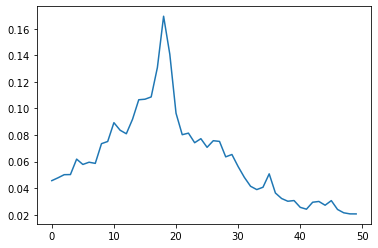

In [73]:
plt.plot(distances)

# Sampling of Paths

In [6]:
with open('./hotel0/trained/network-snapshot-025000.pkl', 'rb') as f:
    large = pickle.load(f)['G'].cuda(3)  # torch.nn.Module    

In [87]:
number_paths = 100
flips = []
paths = []

In [88]:
#We create matrix consisting of value of all images in every path, and 
#store the rows corresponding to visual flips.
for i in range(number_paths):
    images, current_flips = sample_path(large, device, 50, len(paths))
    
    if i==0:
        paths = images
    else:
        paths = torch.vstack((paths, images))
    
    flips.extend(current_flips)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /afs/csail.mit.edu/u/d/draygoza/.conda/envs/diego/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
Setting up

In [89]:
#We reduce the images to 2-dimensional space for better visualization
matrix = np.array(paths.cpu())
reduced = TSNE(n_components=2).fit_transform(matrix)

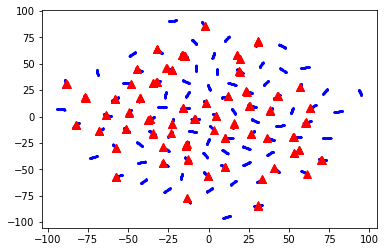

In [90]:
#We plot the path and highlight points that correspond to visual flips
plt.plot(reduced[:,0], reduced[:,1], 'b.', markersize=2)
for flip in flips:
    plt.plot(reduced[flip, 0], reduced[flip, 1], 'r^', markersize=8)